Ablang: 16948
Antifold: 17840
ESM1f: 16948
PyRosetta: 16948


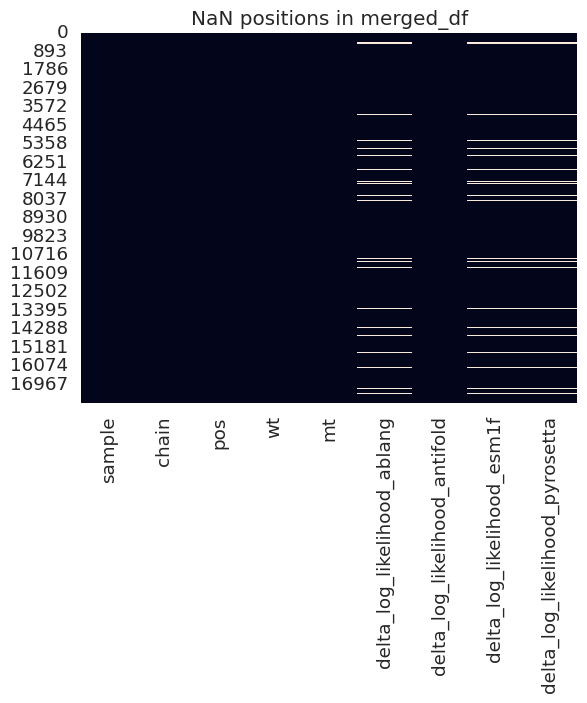

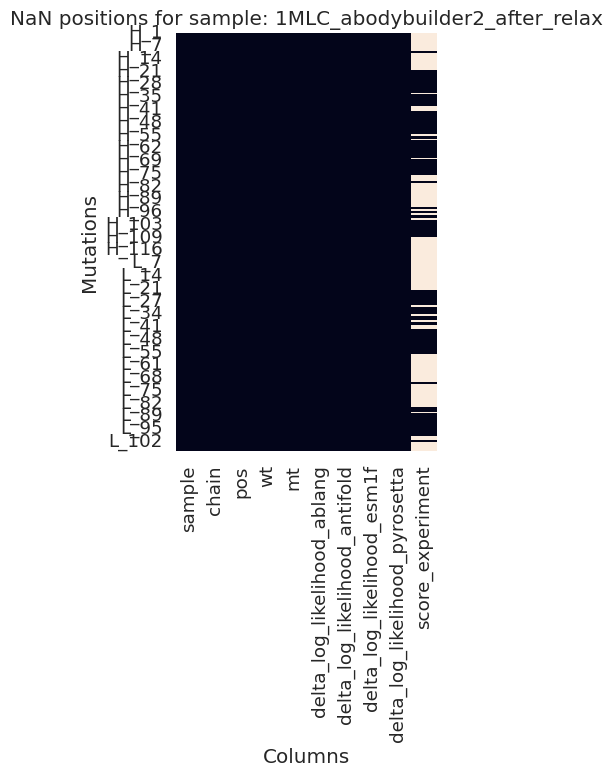

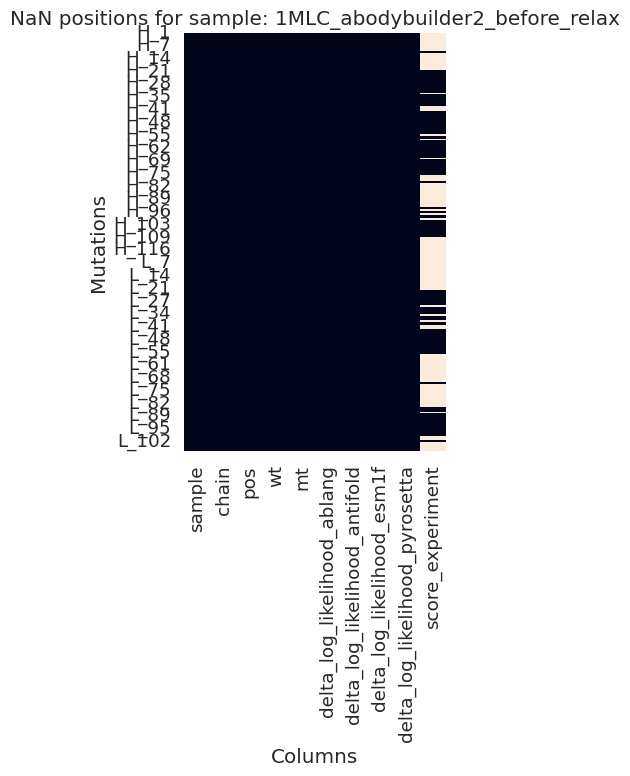

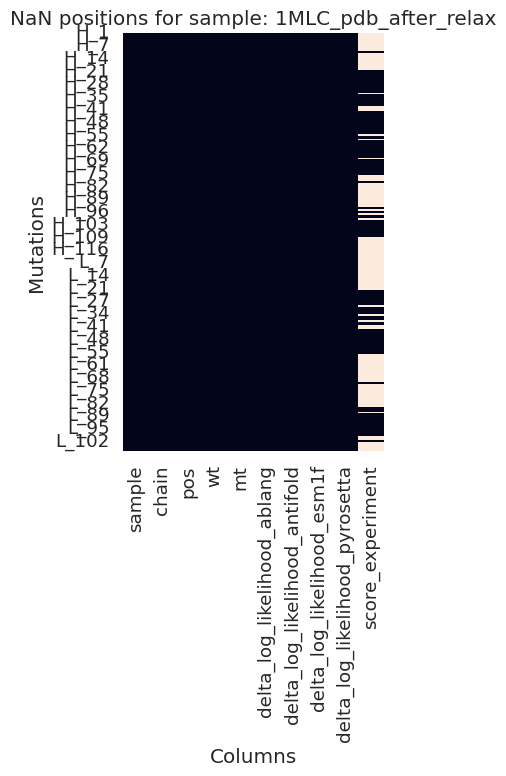

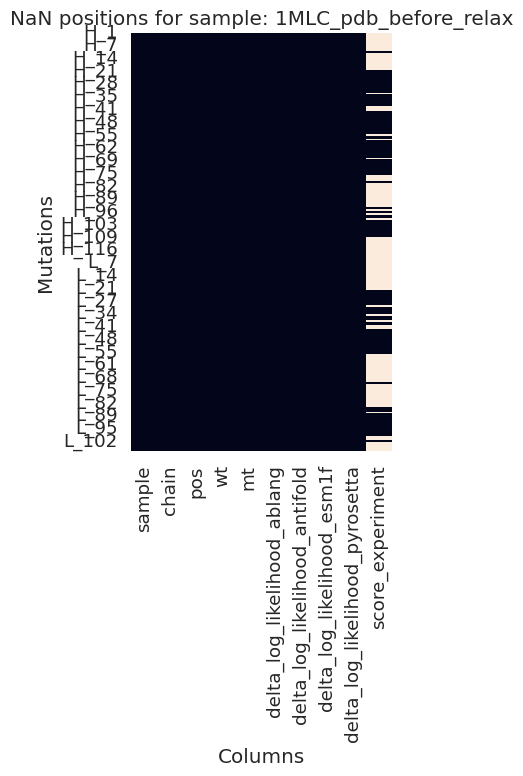

In [75]:
import pandas as pd
results_dir = '/home/eva/0_point_mutation/benchmark_results/playground_mAb_DMS/results/'
ablang_csv = pd.read_csv(results_dir + 'mab_ablang.csv')
antifold_csv = pd.read_csv(results_dir + 'mab_antifold.csv')
esm1f_csv = pd.read_csv(results_dir + 'mab_esm1f.csv')
pyrosetta_csv = pd.read_csv(results_dir + 'mab_pyrosetta.csv')
experiment_csv = pd.read_csv('/home/eva/0_point_mutation/benchmark_results/playground_mAb_DMS/experiment.csv')

ablang_keep = ablang_csv[["sample","chain", "pos", "wt", "mt","delta_log_likelihood_ablang"]]
antifold_keep = antifold_csv[["sample","chain", "pos", "wt", "mt","delta_log_likelihood_antifold"]]
esm1f_keep = esm1f_csv[["sample","chain", "pos", "wt", "mt","delta_log_likelihood_esm1f"]]
pyrosetta_keep = pyrosetta_csv[["sample","chain", "pos", "wt", "mt","delta_log_likelihood_pyrosetta"]]
experiment_keep = experiment_csv[["chain", "pos", "wt", "mt","score_experiment"]]

print("Ablang:", len(ablang_keep))
print("Antifold:", len(antifold_keep))
print("ESM1f:", len(esm1f_keep))
print("PyRosetta:", len(pyrosetta_keep))


# Merge all dataframes on sample, chain, pos, wt, mt
merged_df = ablang_keep.merge(antifold_keep, on=["sample","chain","pos","wt","mt"], how="outer")
merged_df = merged_df.merge(esm1f_keep, on=["sample","chain","pos","wt","mt"], how="outer")
merged_df = merged_df.merge(pyrosetta_keep, on=["sample","chain","pos","wt","mt"], how="outer")

merged_df.isna().any().any()
merged_df.isna().sum()

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(merged_df.isna(), cbar=False)
plt.title("NaN positions in merged_df")
plt.show()

# It turned out only antifold calculate when mt=wt

# Fill all NA values with 0
merged_df = merged_df.fillna("0")

# Merge experimental data into merged_df
merged_df = merged_df.merge(experiment_merged, on=["sample", "chain", "pos", "wt", "mt"], how="outer")

# Plot a heatmap of NaNs for each sample
unique_samples = merged_df['sample'].unique()

for sample in unique_samples:
    sample_df = merged_df[merged_df['sample'] == sample].sort_values(by=["chain", "pos", "wt", "mt"])
    
    # If sample_df is too short (e.g., 1 row), heatmap may error out
    if sample_df.shape[0] < 2:
        print(f"Skipping heatmap for sample {sample} (not enough rows).")
        continue
    
    # Use chain and pos as the index for y-axis labeling
    sample_df = sample_df.set_index(sample_df['chain'] + "_" + sample_df['pos'].astype(str))

    plt.figure(figsize=(4, 8)) 
    sns.heatmap(sample_df.isna(), cbar=False)
    plt.title(f"NaN positions for sample: {sample}")
    plt.xlabel("Columns")
    plt.ylabel("Mutations")
    plt.tight_layout()
    plt.show()



In [83]:
merged_df.to_csv('merged_df_check.csv')

# Correlation using all the values

,delta_log_likelihood_ablang,delta_log_likelihood_antifold,delta_log_likelihood_esm1f,delta_log_likelihood_pyrosetta
delta_log_likelihood_ablang,1.000000,0.614257,0.371537,0.137530
delta_log_likelihood_antifold,0.614257,1.000000,0.738464,0.318126
delta_log_likelihood_esm1f,0.371537,0.738464,1.000000,0.380530
delta_log_likelihood_pyrosetta,0.137530,0.318126,0.380530,1.000000


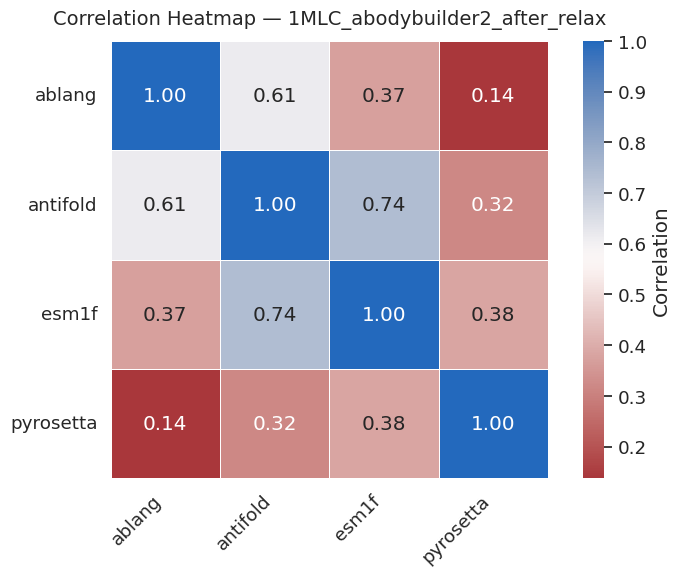

,delta_log_likelihood_ablang,delta_log_likelihood_antifold,delta_log_likelihood_esm1f,delta_log_likelihood_pyrosetta
delta_log_likelihood_ablang,1.000000,0.610176,0.370280,0.114823
delta_log_likelihood_antifold,0.610176,1.000000,0.740992,0.291965
delta_log_likelihood_esm1f,0.370280,0.740992,1.000000,0.374271
delta_log_likelihood_pyrosetta,0.114823,0.291965,0.374271,1.000000


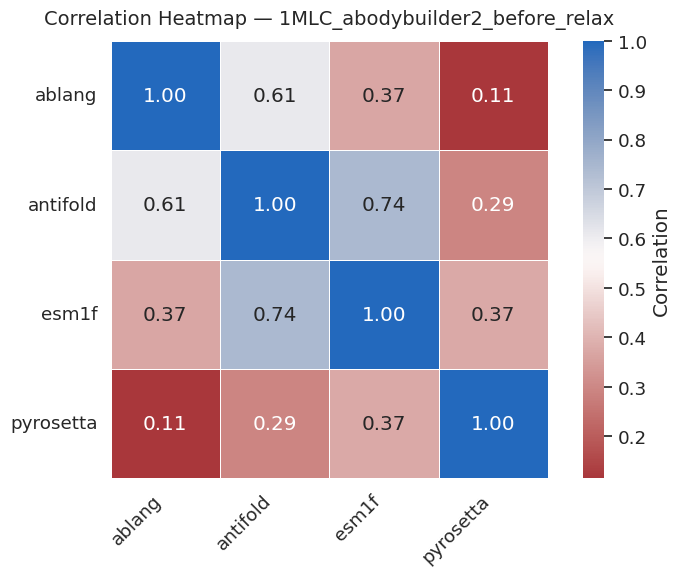

,delta_log_likelihood_ablang,delta_log_likelihood_antifold,delta_log_likelihood_esm1f,delta_log_likelihood_pyrosetta
delta_log_likelihood_ablang,1.000000,0.505636,0.370698,0.130359
delta_log_likelihood_antifold,0.505636,1.000000,0.784031,0.343192
delta_log_likelihood_esm1f,0.370698,0.784031,1.000000,0.383375
delta_log_likelihood_pyrosetta,0.130359,0.343192,0.383375,1.000000


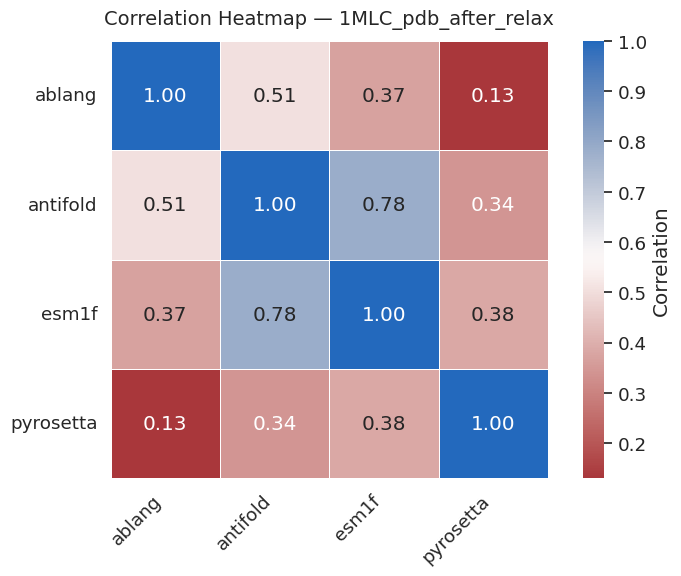

,delta_log_likelihood_ablang,delta_log_likelihood_antifold,delta_log_likelihood_esm1f,delta_log_likelihood_pyrosetta
delta_log_likelihood_ablang,1.000000,0.515686,0.373164,0.149923
delta_log_likelihood_antifold,0.515686,1.000000,0.767398,0.291069
delta_log_likelihood_esm1f,0.373164,0.767398,1.000000,0.301200
delta_log_likelihood_pyrosetta,0.149923,0.291069,0.301200,1.000000


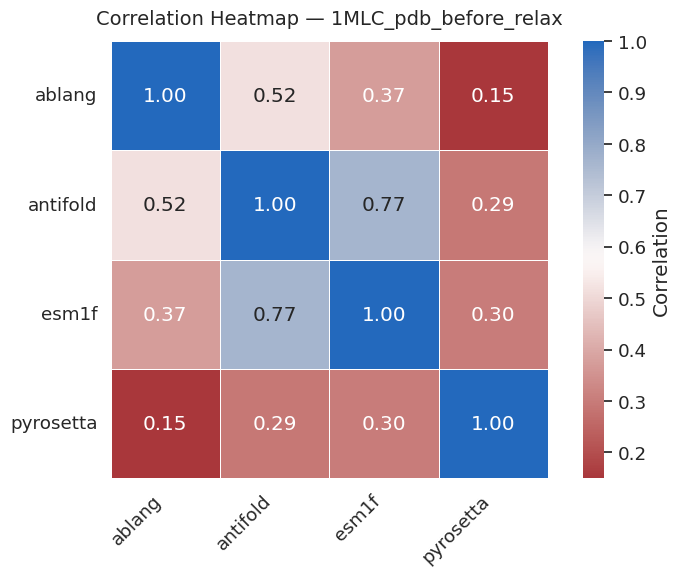

In [76]:

# Step 3: Loop over each sample
samples = merged_df["sample"].unique()

# Use a modern Seaborn theme
sns.set_theme(style="whitegrid", font_scale=1.2)

delta_columns = [col for col in merged_df.columns if col.startswith('delta')]

for sample in samples:
    sample_df = merged_df[merged_df["sample"] == sample][delta_columns]

    if sample_df.shape[0] < 2:
        continue

    corr = sample_df.corr()
    display(corr)

    # Abbreviate column names: get last part after "_" (e.g. 'pyrosetta' from 'delta_log_likelihood_pyrosetta')
    abbrev = {col: col.split("_")[-1] for col in corr.columns}
    corr.rename(columns=abbrev, index=abbrev, inplace=True)

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(
        corr,
        annot=True, #display numeric value
        fmt=".2f", #format to .2 decimal places
        cmap="vlag_r", 
        linewidths=0.5,#draw gridline between cell with 0.5
        linecolor="white",
        square=True, #keep each cell square
        cbar_kws={"label": "Correlation"},#add label to the color bar
    )

    plt.title(f"Correlation Heatmap — {sample}", fontsize=14, pad=12)
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


Correlation with the rows when there is experimental result

,delta_log_likelihood_ablang,delta_log_likelihood_antifold,delta_log_likelihood_esm1f,delta_log_likelihood_pyrosetta,score_experiment
delta_log_likelihood_ablang,1.000000,0.645757,0.383567,0.164152,0.459065
delta_log_likelihood_antifold,0.645757,1.000000,0.736045,0.309333,0.486760
delta_log_likelihood_esm1f,0.383567,0.736045,1.000000,0.382364,0.398159
delta_log_likelihood_pyrosetta,0.164152,0.309333,0.382364,1.000000,0.152629
score_experiment,0.459065,0.486760,0.398159,0.152629,1.000000


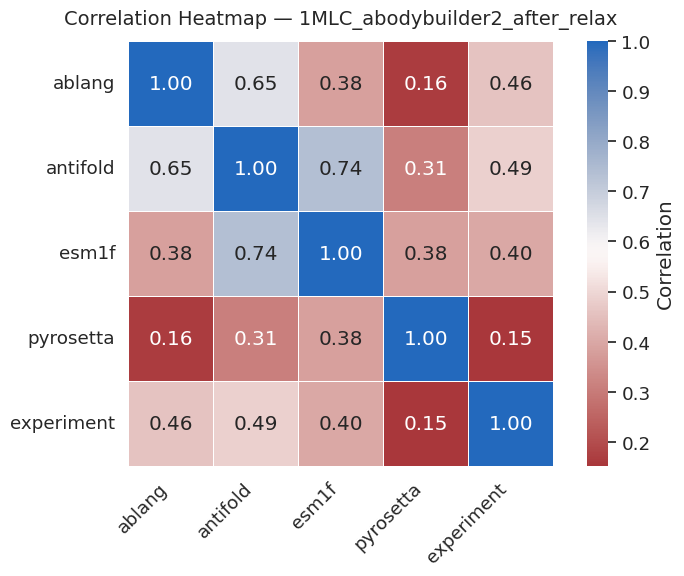

,delta_log_likelihood_ablang,delta_log_likelihood_antifold,delta_log_likelihood_esm1f,delta_log_likelihood_pyrosetta,score_experiment
delta_log_likelihood_ablang,1.000000,0.646745,0.406358,0.161959,0.459065
delta_log_likelihood_antifold,0.646745,1.000000,0.749739,0.293103,0.480913
delta_log_likelihood_esm1f,0.406358,0.749739,1.000000,0.374232,0.392414
delta_log_likelihood_pyrosetta,0.161959,0.293103,0.374232,1.000000,0.157267
score_experiment,0.459065,0.480913,0.392414,0.157267,1.000000


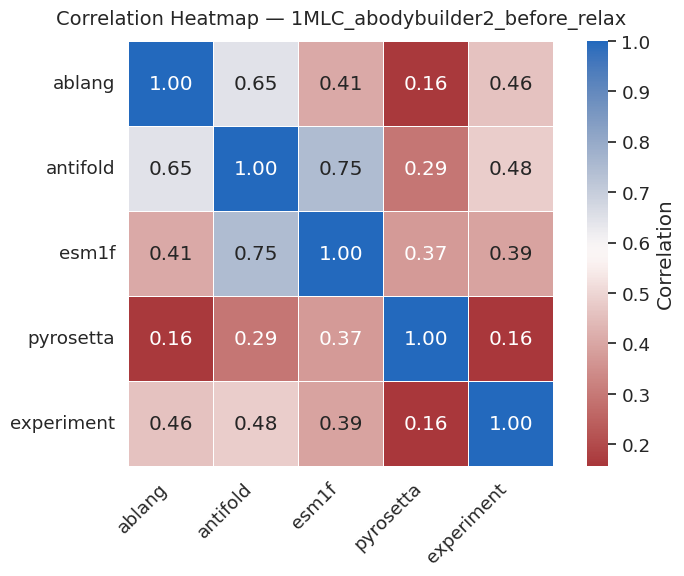

,delta_log_likelihood_ablang,delta_log_likelihood_antifold,delta_log_likelihood_esm1f,delta_log_likelihood_pyrosetta,score_experiment
delta_log_likelihood_ablang,1.000000,0.548537,0.383336,0.175296,0.459065
delta_log_likelihood_antifold,0.548537,1.000000,0.756303,0.357443,0.435606
delta_log_likelihood_esm1f,0.383336,0.756303,1.000000,0.398226,0.414913
delta_log_likelihood_pyrosetta,0.175296,0.357443,0.398226,1.000000,0.180121
score_experiment,0.459065,0.435606,0.414913,0.180121,1.000000


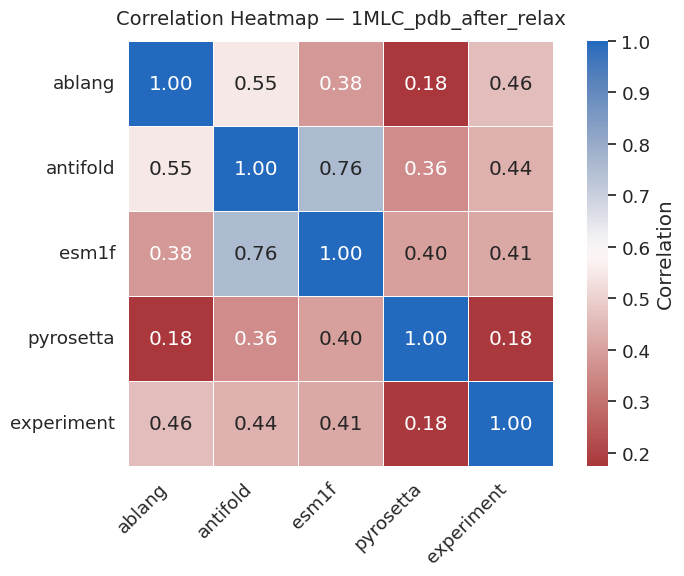

,delta_log_likelihood_ablang,delta_log_likelihood_antifold,delta_log_likelihood_esm1f,delta_log_likelihood_pyrosetta,score_experiment
delta_log_likelihood_ablang,1.000000,0.567615,0.398517,0.169658,0.459065
delta_log_likelihood_antifold,0.567615,1.000000,0.754191,0.291374,0.463746
delta_log_likelihood_esm1f,0.398517,0.754191,1.000000,0.318416,0.424271
delta_log_likelihood_pyrosetta,0.169658,0.291374,0.318416,1.000000,0.163103
score_experiment,0.459065,0.463746,0.424271,0.163103,1.000000


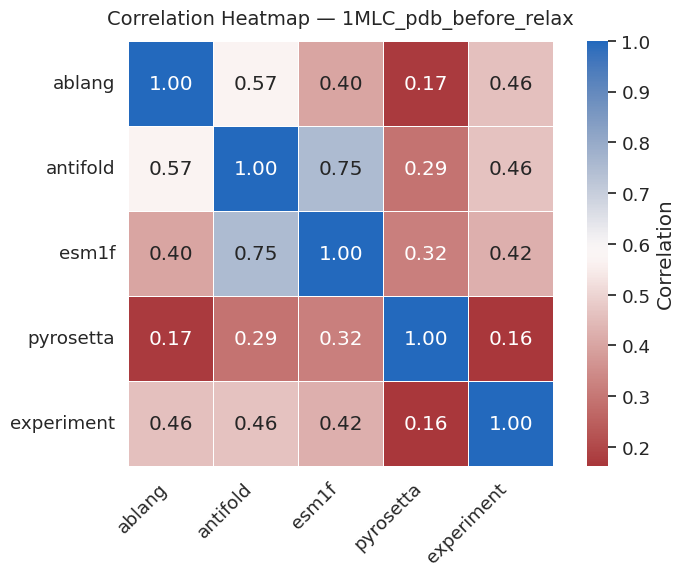

In [78]:

# Step 3: Loop over each sample
samples = merged_df["sample"].unique()

# Use a modern Seaborn theme
sns.set_theme(style="whitegrid", font_scale=1.2)

delta_score_columns = [col for col in merged_df.columns if col.startswith('delta') or col.startswith('score')]
score_columns = [col for col in merged_df.columns if col.startswith('score')]

for sample in samples:
    sample_df = merged_df[merged_df["sample"] == sample][delta_score_columns]
    sample_df = sample_df[sample_df[score_columns].notna().any(axis=1)]
    sample_df['score_experiment'] = sample_df['score_experiment'].astype(float) * (-1)

    if sample_df.shape[0] < 2:
        continue

    corr = sample_df.corr()
    display(corr)

    # Abbreviate column names: get last part after "_" (e.g. 'pyrosetta' from 'delta_log_likelihood_pyrosetta')
    abbrev = {col: col.split("_")[-1] for col in corr.columns}
    corr.rename(columns=abbrev, index=abbrev, inplace=True)

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(
        corr,
        annot=True, #display numeric value
        fmt=".2f", #format to .2 decimal places
        cmap="vlag_r", 
        linewidths=0.5,#draw gridline between cell with 0.5
        linecolor="white",
        square=True, #keep each cell square
        cbar_kws={"label": "Correlation"},#add label to the color bar
    )

    plt.title(f"Correlation Heatmap — {sample}", fontsize=14, pad=12)
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_2461/1382249946.py:78: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_transformed = pivot.applymap(signed_log_default)


Sample: 1MLC_abodybuilder2_after_relax, Chain: H, Delta: delta_log_likelihood_ablang
pivot shape: (20, 116)
pivot_transformed NaNs: 0
Original NaNs before transformation: 0


/tmp/ipykernel_2461/1382249946.py:78: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_transformed = pivot.applymap(signed_log_default)


Sample: 1MLC_abodybuilder2_after_relax, Chain: L, Delta: delta_log_likelihood_ablang
pivot shape: (20, 107)
pivot_transformed NaNs: 0
Original NaNs before transformation: 0


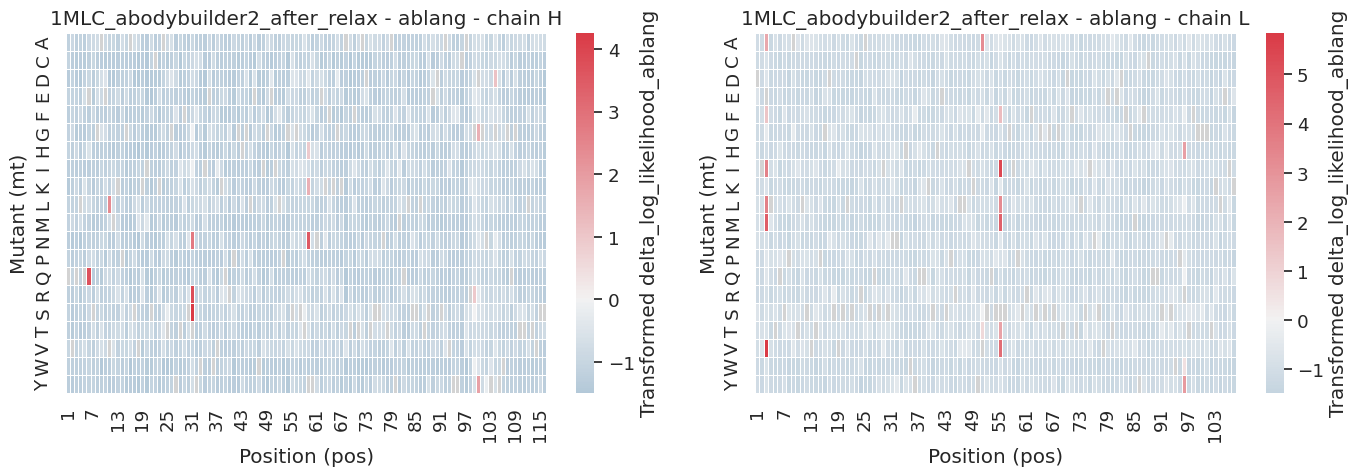

/tmp/ipykernel_2461/1382249946.py:78: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_transformed = pivot.applymap(signed_log_default)


Sample: 1MLC_abodybuilder2_after_relax, Chain: H, Delta: delta_log_likelihood_antifold
pivot shape: (20, 116)
pivot_transformed NaNs: 0
Original NaNs before transformation: 0


/tmp/ipykernel_2461/1382249946.py:78: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_transformed = pivot.applymap(signed_log_default)


Sample: 1MLC_abodybuilder2_after_relax, Chain: L, Delta: delta_log_likelihood_antifold
pivot shape: (20, 107)
pivot_transformed NaNs: 0
Original NaNs before transformation: 0


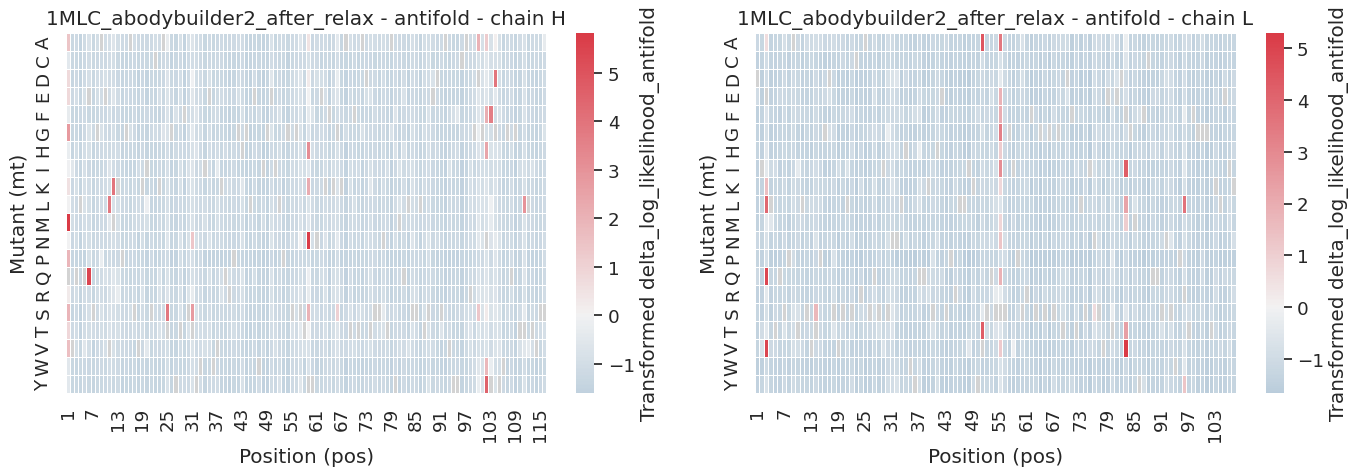

/tmp/ipykernel_2461/1382249946.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_transformed = pivot.applymap(signed_log_esm1f)


Sample: 1MLC_abodybuilder2_after_relax, Chain: H, Delta: delta_log_likelihood_esm1f
pivot shape: (20, 116)
pivot_transformed NaNs: 0
Original NaNs before transformation: 0


/tmp/ipykernel_2461/1382249946.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_transformed = pivot.applymap(signed_log_esm1f)


Sample: 1MLC_abodybuilder2_after_relax, Chain: L, Delta: delta_log_likelihood_esm1f
pivot shape: (20, 107)
pivot_transformed NaNs: 0
Original NaNs before transformation: 0


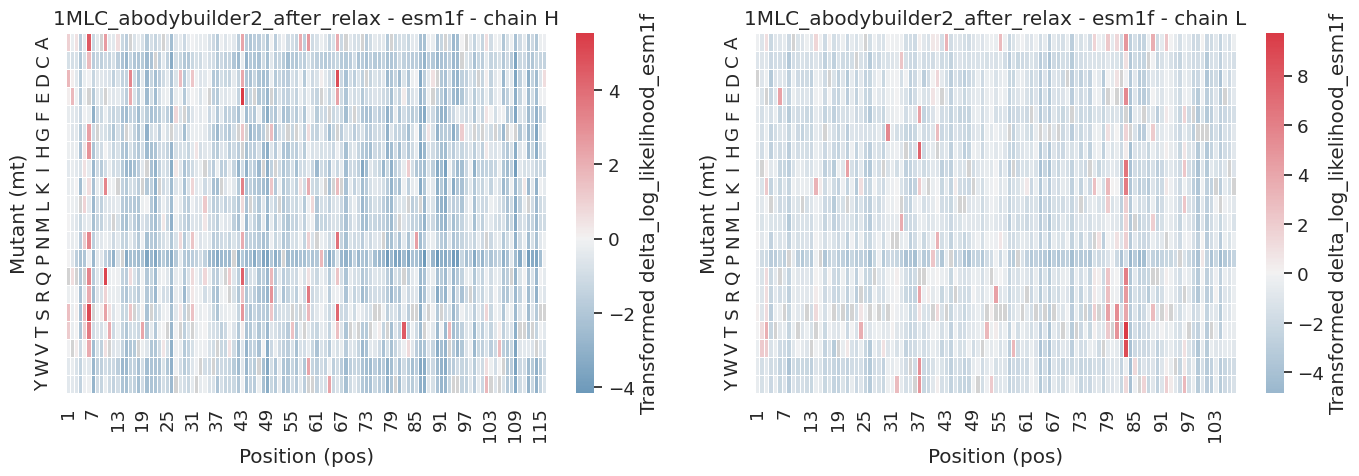

/tmp/ipykernel_2461/1382249946.py:76: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_transformed = pivot.applymap(signed_log_pyrosetta)


Sample: 1MLC_abodybuilder2_after_relax, Chain: H, Delta: delta_log_likelihood_pyrosetta
pivot shape: (20, 116)
pivot_transformed NaNs: 0
Original NaNs before transformation: 0


/tmp/ipykernel_2461/1382249946.py:76: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_transformed = pivot.applymap(signed_log_pyrosetta)


Sample: 1MLC_abodybuilder2_after_relax, Chain: L, Delta: delta_log_likelihood_pyrosetta
pivot shape: (20, 107)
pivot_transformed NaNs: 0
Original NaNs before transformation: 0


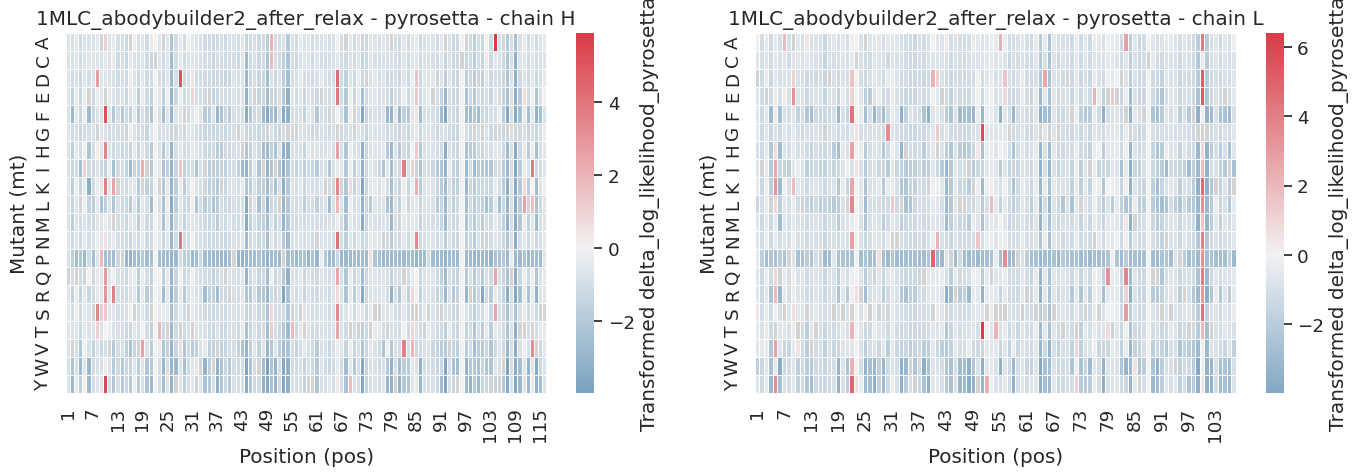

/tmp/ipykernel_2461/1382249946.py:78: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_transformed = pivot.applymap(signed_log_default)


Sample: 1MLC_abodybuilder2_before_relax, Chain: H, Delta: delta_log_likelihood_ablang
pivot shape: (20, 116)
pivot_transformed NaNs: 0
Original NaNs before transformation: 0


/tmp/ipykernel_2461/1382249946.py:78: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_transformed = pivot.applymap(signed_log_default)


Sample: 1MLC_abodybuilder2_before_relax, Chain: L, Delta: delta_log_likelihood_ablang
pivot shape: (20, 107)
pivot_transformed NaNs: 0
Original NaNs before transformation: 0


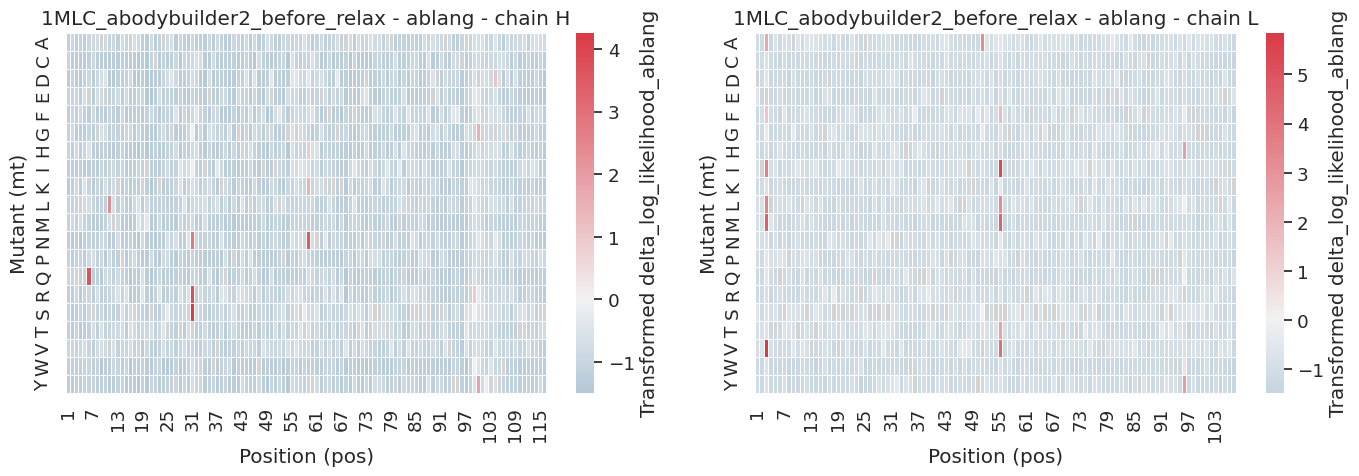

/tmp/ipykernel_2461/1382249946.py:78: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_transformed = pivot.applymap(signed_log_default)


Sample: 1MLC_abodybuilder2_before_relax, Chain: H, Delta: delta_log_likelihood_antifold
pivot shape: (20, 116)
pivot_transformed NaNs: 0
Original NaNs before transformation: 0


/tmp/ipykernel_2461/1382249946.py:78: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_transformed = pivot.applymap(signed_log_default)


Sample: 1MLC_abodybuilder2_before_relax, Chain: L, Delta: delta_log_likelihood_antifold
pivot shape: (20, 107)
pivot_transformed NaNs: 0
Original NaNs before transformation: 0


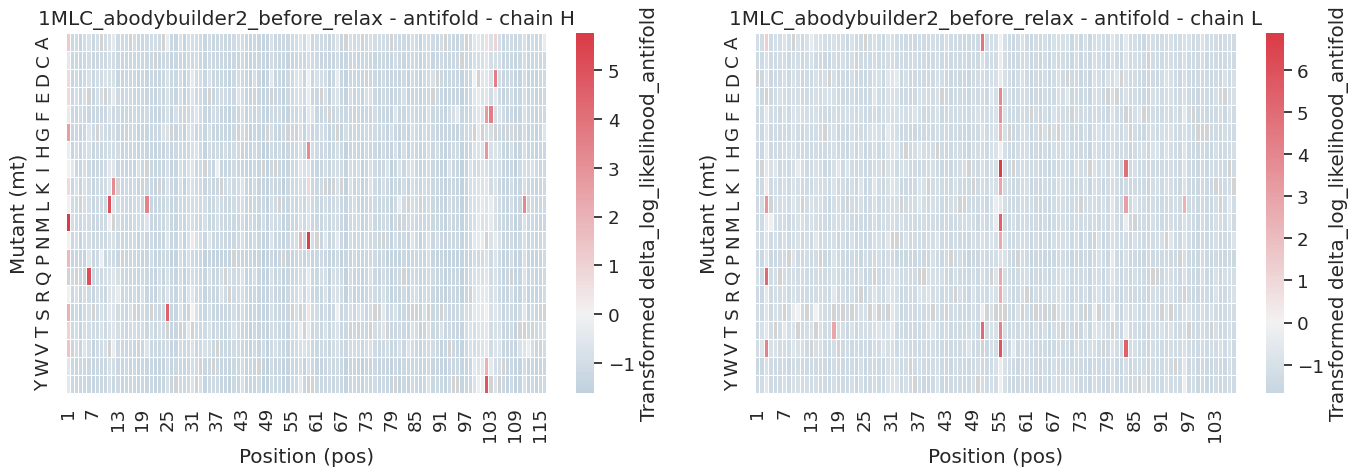

/tmp/ipykernel_2461/1382249946.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_transformed = pivot.applymap(signed_log_esm1f)


Sample: 1MLC_abodybuilder2_before_relax, Chain: H, Delta: delta_log_likelihood_esm1f
pivot shape: (20, 116)
pivot_transformed NaNs: 0
Original NaNs before transformation: 0


/tmp/ipykernel_2461/1382249946.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_transformed = pivot.applymap(signed_log_esm1f)


Sample: 1MLC_abodybuilder2_before_relax, Chain: L, Delta: delta_log_likelihood_esm1f
pivot shape: (20, 107)
pivot_transformed NaNs: 0
Original NaNs before transformation: 0


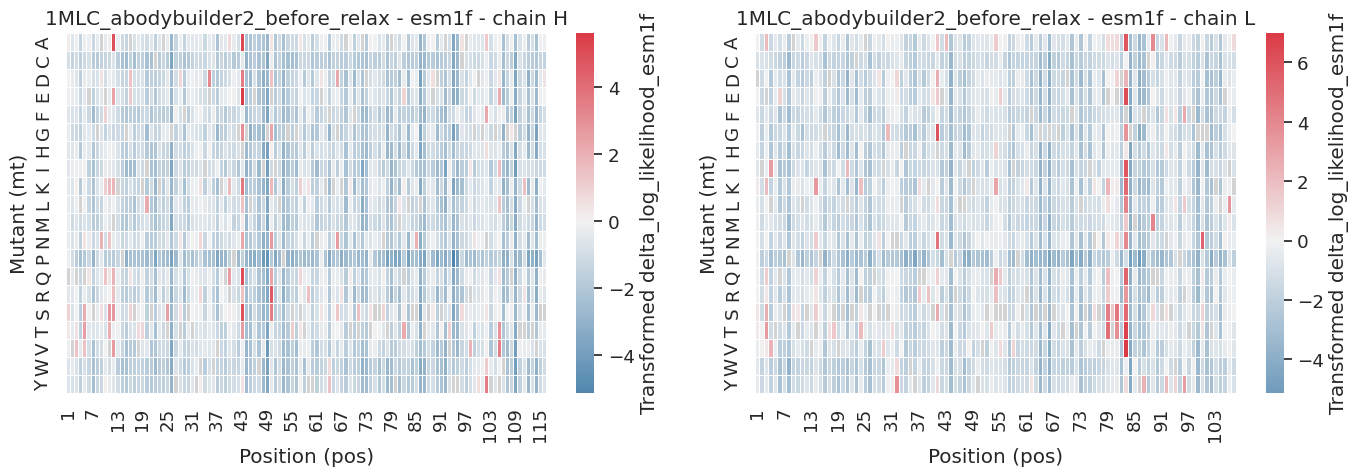

/tmp/ipykernel_2461/1382249946.py:76: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_transformed = pivot.applymap(signed_log_pyrosetta)


Sample: 1MLC_abodybuilder2_before_relax, Chain: H, Delta: delta_log_likelihood_pyrosetta
pivot shape: (20, 116)
pivot_transformed NaNs: 0
Original NaNs before transformation: 0


/tmp/ipykernel_2461/1382249946.py:76: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_transformed = pivot.applymap(signed_log_pyrosetta)


Sample: 1MLC_abodybuilder2_before_relax, Chain: L, Delta: delta_log_likelihood_pyrosetta
pivot shape: (20, 107)
pivot_transformed NaNs: 0
Original NaNs before transformation: 0


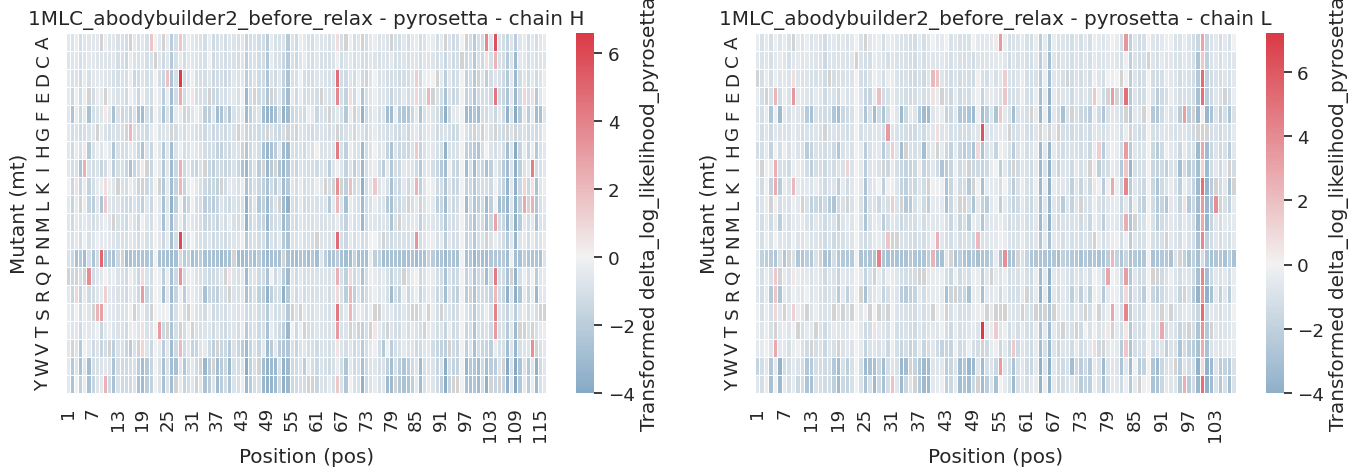

/tmp/ipykernel_2461/1382249946.py:78: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_transformed = pivot.applymap(signed_log_default)


Sample: 1MLC_pdb_after_relax, Chain: H, Delta: delta_log_likelihood_ablang
pivot shape: (20, 116)
pivot_transformed NaNs: 0
Original NaNs before transformation: 0


/tmp/ipykernel_2461/1382249946.py:78: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_transformed = pivot.applymap(signed_log_default)


Sample: 1MLC_pdb_after_relax, Chain: L, Delta: delta_log_likelihood_ablang
pivot shape: (20, 107)
pivot_transformed NaNs: 0
Original NaNs before transformation: 0


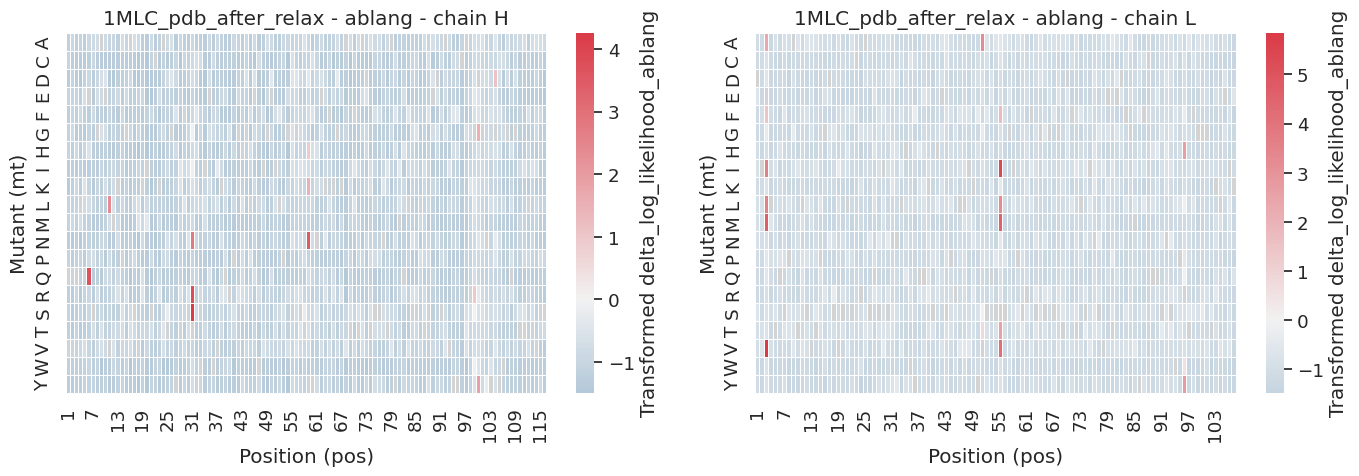

/tmp/ipykernel_2461/1382249946.py:78: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_transformed = pivot.applymap(signed_log_default)


Sample: 1MLC_pdb_after_relax, Chain: H, Delta: delta_log_likelihood_antifold
pivot shape: (20, 116)
pivot_transformed NaNs: 0
Original NaNs before transformation: 0


/tmp/ipykernel_2461/1382249946.py:78: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_transformed = pivot.applymap(signed_log_default)


Sample: 1MLC_pdb_after_relax, Chain: L, Delta: delta_log_likelihood_antifold
pivot shape: (20, 107)
pivot_transformed NaNs: 0
Original NaNs before transformation: 0


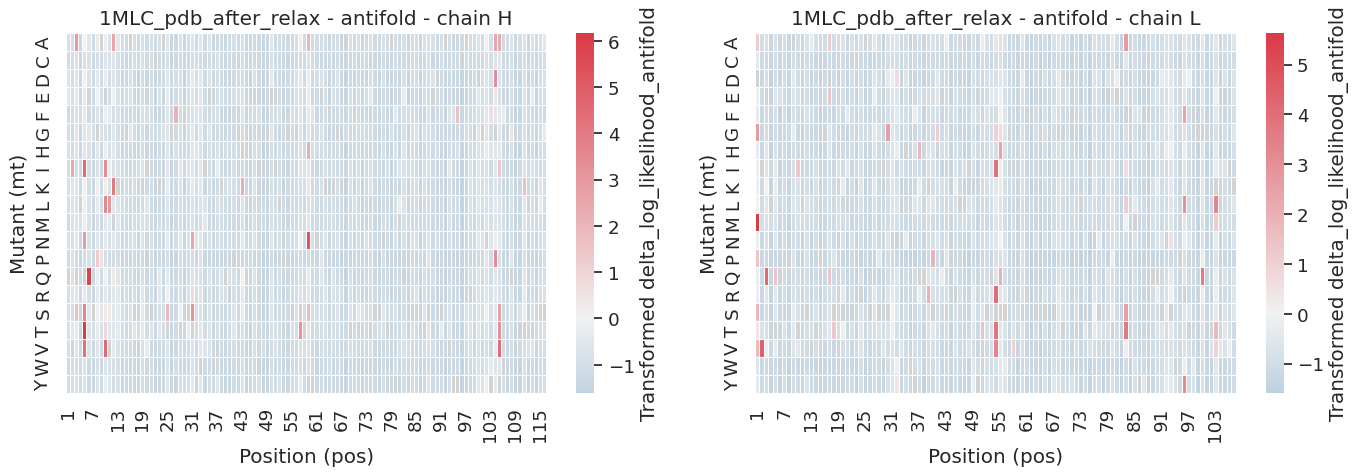

/tmp/ipykernel_2461/1382249946.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_transformed = pivot.applymap(signed_log_esm1f)


Sample: 1MLC_pdb_after_relax, Chain: H, Delta: delta_log_likelihood_esm1f
pivot shape: (20, 116)
pivot_transformed NaNs: 0
Original NaNs before transformation: 0


/tmp/ipykernel_2461/1382249946.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_transformed = pivot.applymap(signed_log_esm1f)


Sample: 1MLC_pdb_after_relax, Chain: L, Delta: delta_log_likelihood_esm1f
pivot shape: (20, 107)
pivot_transformed NaNs: 0
Original NaNs before transformation: 0


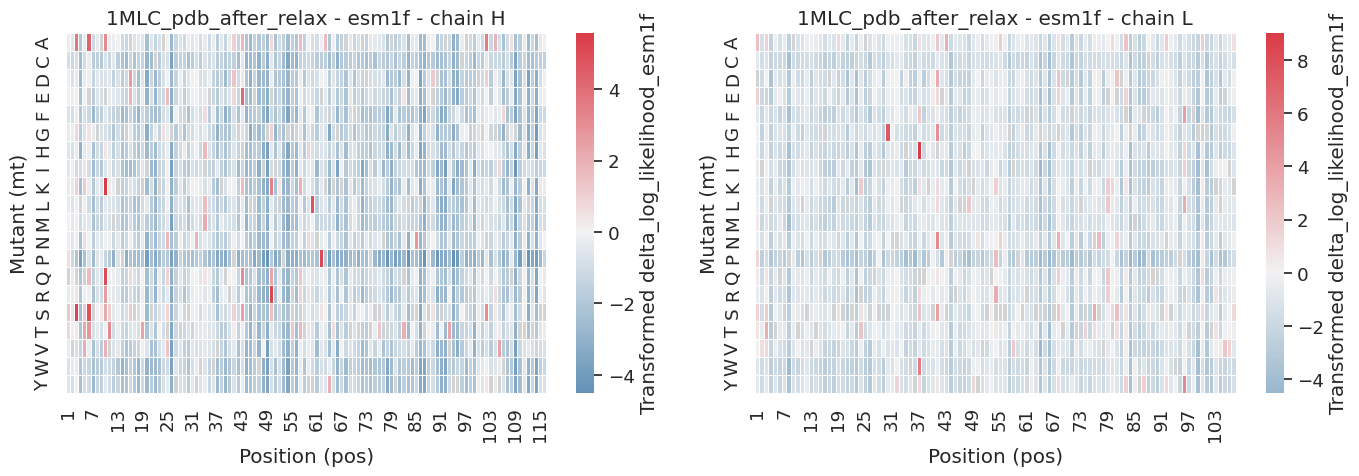

/tmp/ipykernel_2461/1382249946.py:76: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_transformed = pivot.applymap(signed_log_pyrosetta)


Sample: 1MLC_pdb_after_relax, Chain: H, Delta: delta_log_likelihood_pyrosetta
pivot shape: (20, 116)
pivot_transformed NaNs: 0
Original NaNs before transformation: 0


/tmp/ipykernel_2461/1382249946.py:76: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_transformed = pivot.applymap(signed_log_pyrosetta)


Sample: 1MLC_pdb_after_relax, Chain: L, Delta: delta_log_likelihood_pyrosetta
pivot shape: (20, 107)
pivot_transformed NaNs: 0
Original NaNs before transformation: 0


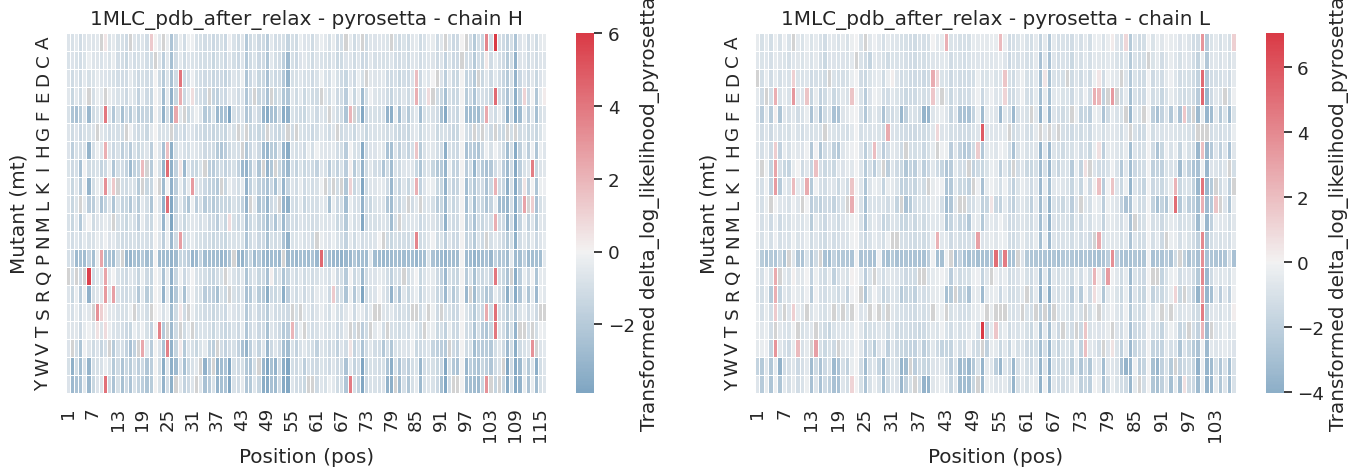

/tmp/ipykernel_2461/1382249946.py:78: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_transformed = pivot.applymap(signed_log_default)


Sample: 1MLC_pdb_before_relax, Chain: H, Delta: delta_log_likelihood_ablang
pivot shape: (20, 116)
pivot_transformed NaNs: 0
Original NaNs before transformation: 0


/tmp/ipykernel_2461/1382249946.py:78: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_transformed = pivot.applymap(signed_log_default)


Sample: 1MLC_pdb_before_relax, Chain: L, Delta: delta_log_likelihood_ablang
pivot shape: (20, 107)
pivot_transformed NaNs: 0
Original NaNs before transformation: 0


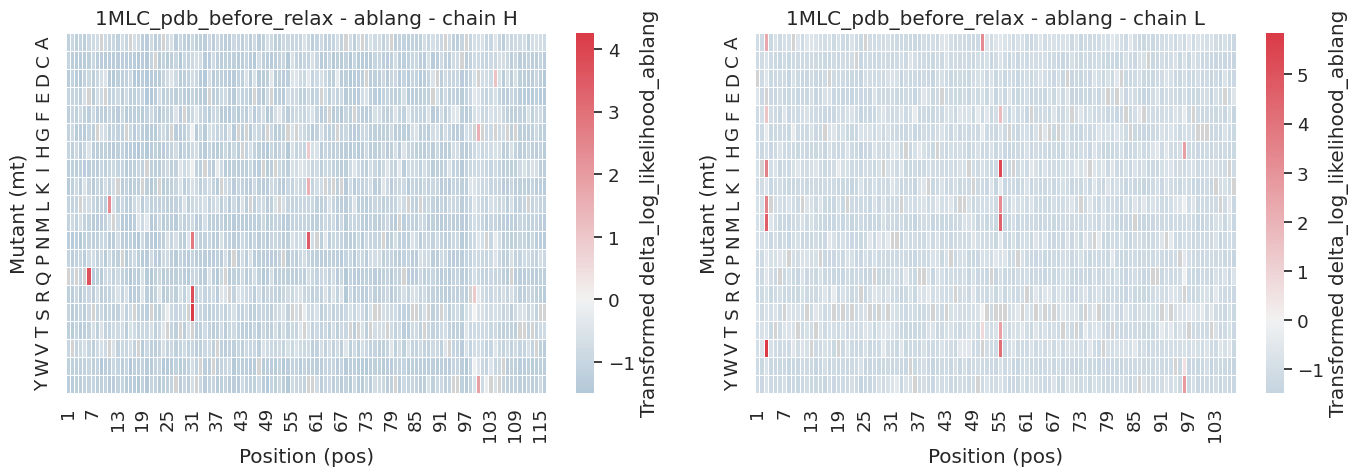

/tmp/ipykernel_2461/1382249946.py:78: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_transformed = pivot.applymap(signed_log_default)


Sample: 1MLC_pdb_before_relax, Chain: H, Delta: delta_log_likelihood_antifold
pivot shape: (20, 116)
pivot_transformed NaNs: 0
Original NaNs before transformation: 0


/tmp/ipykernel_2461/1382249946.py:78: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_transformed = pivot.applymap(signed_log_default)


Sample: 1MLC_pdb_before_relax, Chain: L, Delta: delta_log_likelihood_antifold
pivot shape: (20, 107)
pivot_transformed NaNs: 0
Original NaNs before transformation: 0


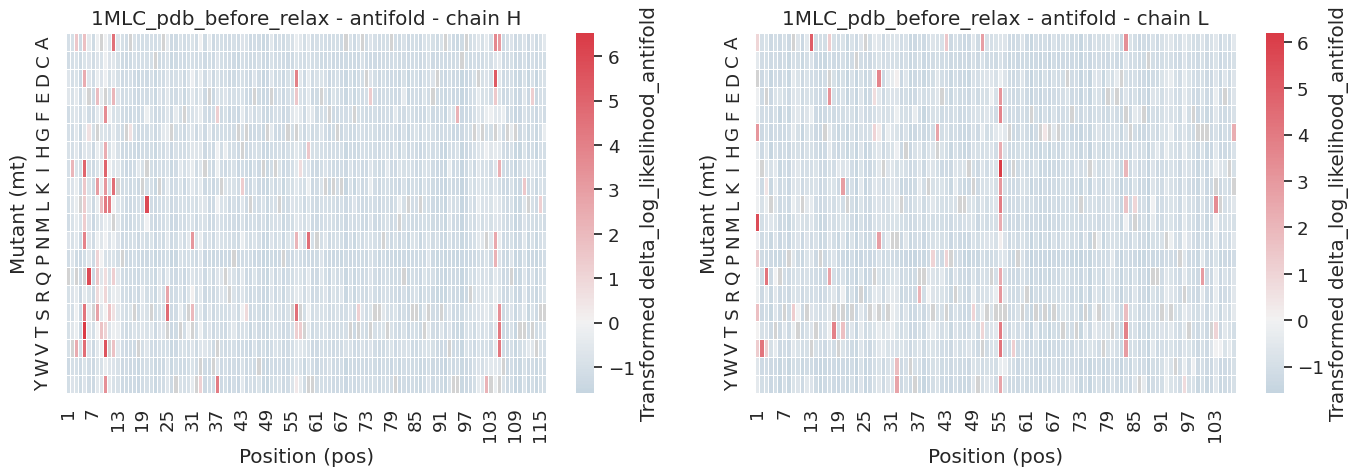

/tmp/ipykernel_2461/1382249946.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_transformed = pivot.applymap(signed_log_esm1f)


Sample: 1MLC_pdb_before_relax, Chain: H, Delta: delta_log_likelihood_esm1f
pivot shape: (20, 116)
pivot_transformed NaNs: 0
Original NaNs before transformation: 0


/tmp/ipykernel_2461/1382249946.py:74: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_transformed = pivot.applymap(signed_log_esm1f)


Sample: 1MLC_pdb_before_relax, Chain: L, Delta: delta_log_likelihood_esm1f
pivot shape: (20, 107)
pivot_transformed NaNs: 0
Original NaNs before transformation: 0


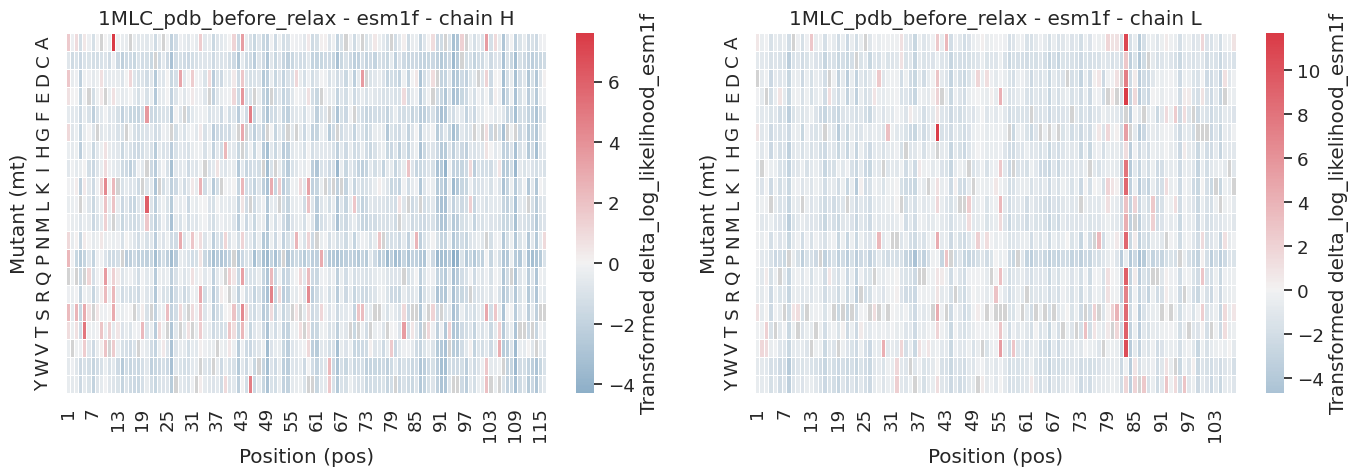

/tmp/ipykernel_2461/1382249946.py:76: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_transformed = pivot.applymap(signed_log_pyrosetta)


Sample: 1MLC_pdb_before_relax, Chain: H, Delta: delta_log_likelihood_pyrosetta
pivot shape: (20, 116)
pivot_transformed NaNs: 0
Original NaNs before transformation: 0


/tmp/ipykernel_2461/1382249946.py:76: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_transformed = pivot.applymap(signed_log_pyrosetta)


Sample: 1MLC_pdb_before_relax, Chain: L, Delta: delta_log_likelihood_pyrosetta
pivot shape: (20, 107)
pivot_transformed NaNs: 0
Original NaNs before transformation: 0


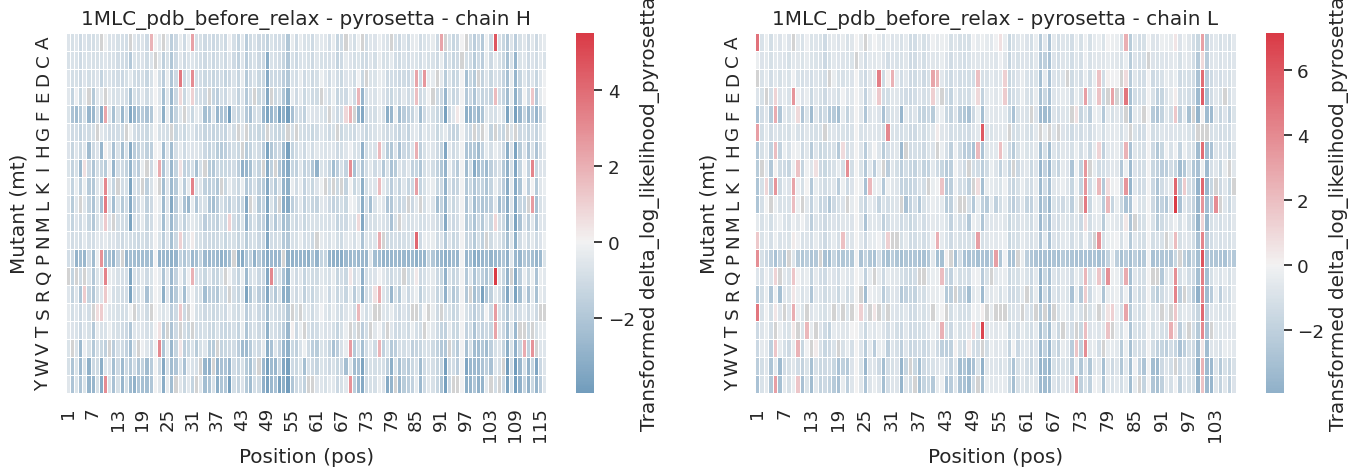

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Use your merged dataframe
df = pd.read_csv('/home/eva/0_point_mutation/benchmark_results/playground_mAb_DMS/merged_df_check.csv')

# Identify delta and score columns
delta_cols = [col for col in df.columns if col.startswith("delta")]
samples = df['sample'].unique()

# Ensure numeric conversion
for col in delta_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

import numpy as np

def signed_log_default(x):
    try:
        val = np.sign(x) * np.log1p(np.abs(x))
        return val * 3 if x > 0 else val * 0.5
    except Exception as e:
        print(f"[signed_log_default] Failed for x = {x}: {e}")
        return np.nan

def signed_log_esm1f(x):
    try:
        val = np.sign(x) * np.log1p(np.abs(x))
        if x > 0:
            return val * 300
        elif x < 0:
            return val * 50
        else:
            return 0  # x == 0
    except Exception as e:
        print(f"[signed_log_esm1f] Failed for x = {x}: {e}")
        return np.nan

def signed_log_pyrosetta(x):
    try:
        val = np.sign(x) * np.log1p(np.abs(x))
        if x > 0:
            return val * 4
        elif x < 0:
            return val * 0.5
        else:
            return 0  # x == 0
    except Exception as e:
        print(f"[signed_log_pyrosetta] Failed for x = {x}: {e}")
        return np.nan


# Define diverging cmap (with meaningful 0 as sperator) with grey mask
def get_diverging_cmap():
    cmap = sns.diverging_palette(240, 10, as_cmap=True)
    cmap.set_bad("lightgrey") #Nan or masked value 
    return cmap

# Iterate through samples
for sample in samples:
    df_sample = df[df['sample'] == sample]

    # === Plot delta columns (with transform) ===
    for delta_col in delta_cols:
        fig, axs = plt.subplots(1, 2, figsize=(14, 5))
        for j, chain_type in enumerate(['H', 'L']):
            df_chain = df_sample[df_sample['chain'] == chain_type]
            pivot = df_chain.pivot(index="mt", columns="pos", values=delta_col).astype(float)

            # Apply appropriate transform
            if delta_col == "delta_log_likelihood_esm1f":
                pivot_transformed = pivot.applymap(signed_log_esm1f)
            elif delta_col == "delta_log_likelihood_pyrosetta":
                pivot_transformed = pivot.applymap(signed_log_pyrosetta)
            else:
                pivot_transformed = pivot.applymap(signed_log_default)
                
            pivot_transformed.to_csv(f'{sample}_{chain_type}.csv')

            # Mask where wt == mt
            mask_data = df_chain[df_chain['wt'] == df_chain['mt']]
            # only masked region is 0.0, the rest is NaN
            mask_matrix = mask_data.pivot(index="mt", columns="pos", values=delta_col)
            # convert to a proper boolean mask, 0.0->True, NaN->False
            mask = mask_matrix.notna().reindex_like(pivot).fillna(False)
            
            print(f"Sample: {sample}, Chain: {chain_type}, Delta: {delta_col}")
            print("pivot shape:", pivot.shape)
            print("pivot_transformed NaNs:", pivot_transformed.isna().sum().sum())
            print("Original NaNs before transformation:", pivot.isna().sum().sum())


            sns.heatmap(
                pivot_transformed,
                mask=mask,
                cmap=get_diverging_cmap(),
                center=0,
                linewidths=0.5,
                cbar_kws={"label": f"Transformed {delta_col}"},
                ax=axs[j]
            )
            method_name = delta_col.split("_")[-1]
            axs[j].set_title(f"{sample} - {method_name} - chain {chain_type}")
            axs[j].set_ylabel("Mutant (mt)")
            axs[j].set_xlabel("Position (pos)")

        plt.tight_layout()
        plt.show()


[1MLC_abodybuilder2_after_relax - chain H] NaNs in pivot: 0
[1MLC_abodybuilder2_after_relax - chain L] NaNs in pivot: 0


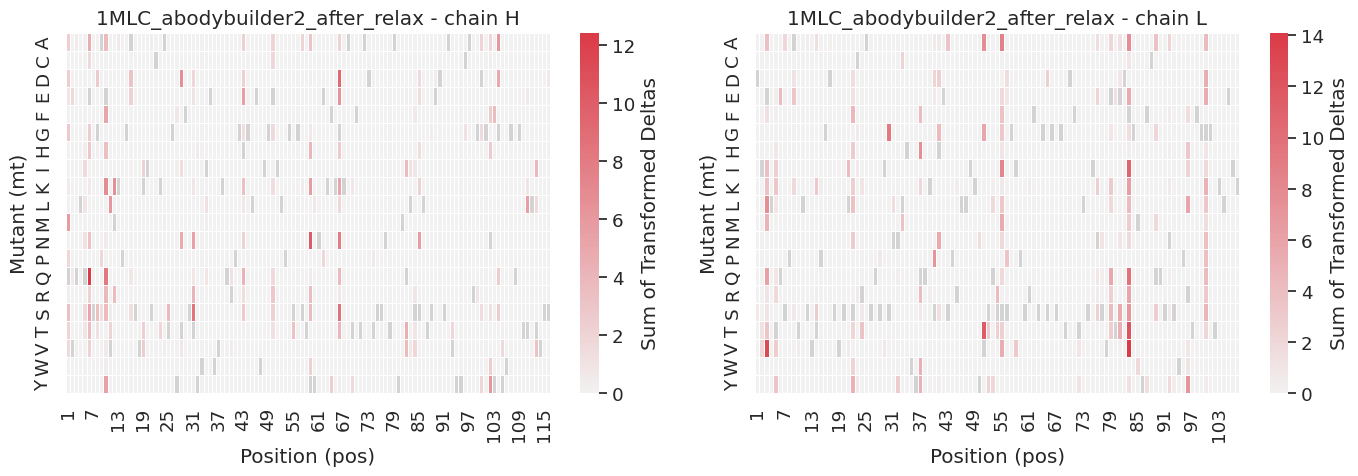

[1MLC_abodybuilder2_before_relax - chain H] NaNs in pivot: 0
[1MLC_abodybuilder2_before_relax - chain L] NaNs in pivot: 0


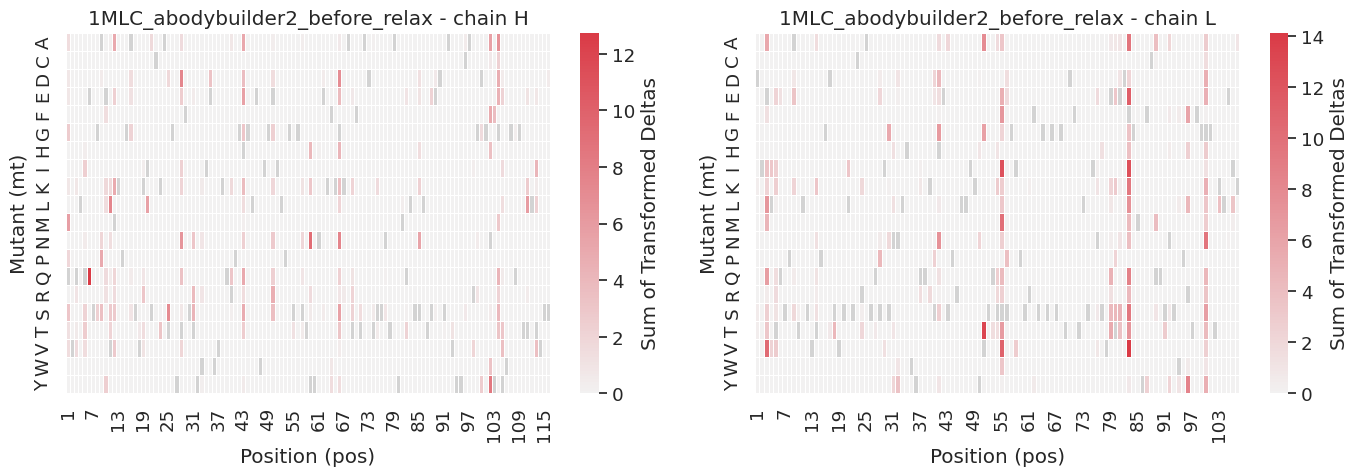

[1MLC_pdb_after_relax - chain H] NaNs in pivot: 0
[1MLC_pdb_after_relax - chain L] NaNs in pivot: 0


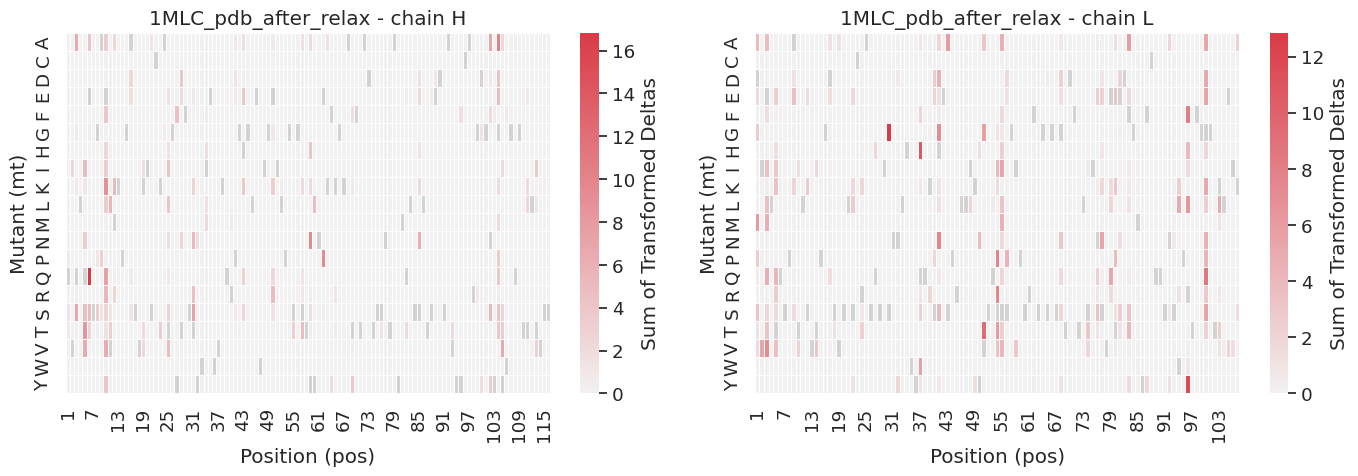

[1MLC_pdb_before_relax - chain H] NaNs in pivot: 0
[1MLC_pdb_before_relax - chain L] NaNs in pivot: 0


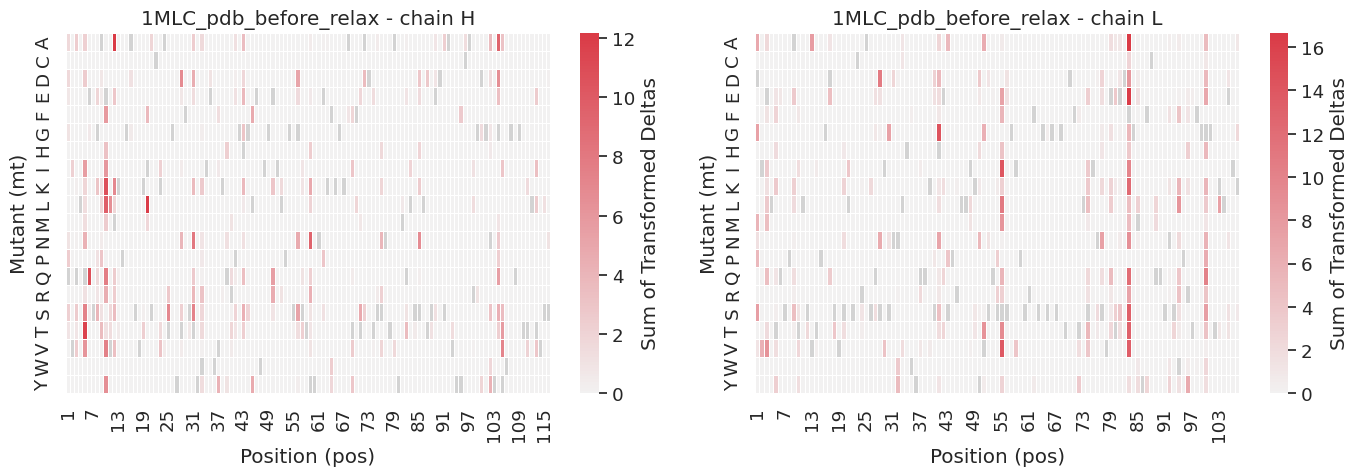

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Use your merged dataframe
df = pd.read_csv('/home/eva/0_point_mutation/benchmark_results/playground_mAb_DMS/merged_df_check.csv')

# Identify delta and score columns
delta_cols = [col for col in df.columns if col.startswith("delta")]
samples = df['sample'].unique()

# Ensure numeric conversion
for col in delta_cols + score_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Custom signed log transforms
def signed_log_default(x):
    try:
        val = np.sign(x) * np.log1p(np.abs(x))
        return val * 3 if x > 0 else val * 0
    except:
        return np.nan

def signed_log_esm1f(x):
    try:
        val = np.sign(x) * np.log1p(np.abs(x))
        if x > 0:
            return val * 300
        elif x < 0:
            return val * 0
        else:
            return 0
    except:
        return np.nan

def signed_log_pyrosetta(x):
    try:
        val = np.sign(x) * np.log1p(np.abs(x))
        if x > 0:
            return np.log1p(x) * 4
        elif x < 0:
            return val * 0
        else:
            return 0
    except:
        return np.nan

# Define diverging cmap (with meaningful 0 as separator) with grey mask
def get_diverging_cmap():
    cmap = sns.diverging_palette(240, 10, as_cmap=True)
    cmap.set_bad("lightgrey")  # NaN or masked values
    return cmap

# Apply custom transforms
df['ablang_transformed'] = df['delta_log_likelihood_ablang'].apply(signed_log_default)
df['antifold_transformed'] = df['delta_log_likelihood_antifold'].apply(signed_log_default)
df['esm1f_transformed'] = df['delta_log_likelihood_esm1f'].apply(signed_log_esm1f)
df['pyrosetta_transformed'] = df['delta_log_likelihood_pyrosetta'].apply(signed_log_pyrosetta)

# Re-collect transformed delta columns
delta_cols = [col for col in df.columns if col.endswith('transformed')]

# Calculate sum_delta (skipna=True includes partial data; set False to exclude incomplete rows)
df["sum_delta"] = df[delta_cols].sum(axis=1, skipna=True)

# Plot heatmaps for each sample and chain
for sample in samples:
    df_sample = df[df['sample'] == sample]
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    for j, chain_type in enumerate(['H', 'L']):
        df_chain = df_sample[df_sample['chain'] == chain_type]

        # Pivot table: rows = mutant (mt), columns = position
        pivot = df_chain.pivot(index='mt', columns='pos', values='sum_delta')

        # Optional: Check NaNs
        print(f"[{sample} - chain {chain_type}] NaNs in pivot: {pivot.isna().sum().sum()}")
        
         # Mask where wt == mt
        mask_data = df_chain[df_chain['wt'] == df_chain['mt']]
        # only masked region is 0.0, the rest is NaN
        mask_matrix = mask_data.pivot(index="mt", columns="pos", values=delta_col)
        # convert to a proper boolean mask, 0.0->True, NaN->False
        mask = mask_matrix.notna().reindex_like(pivot).fillna(False)

        # Plot heatmap
        sns.heatmap(
            pivot,
            mask=mask,
            cmap=get_diverging_cmap(),
            center=0,
            linewidths=0.5,
            cbar_kws={"label": "Sum of Transformed Deltas"},
            ax=axs[j]
        )

        axs[j].set_title(f"{sample} - chain {chain_type}")
        axs[j].set_ylabel("Mutant (mt)")
        axs[j].set_xlabel("Position (pos)")

    plt.tight_layout()
    plt.show()


Sample: 1MLC_abodybuilder2_after_relax, Chain: H, Delta: delta_log_likelihood_pyrosetta
pivot shape: (20, 116)
pivot_transformed NaNs: 1023
Original NaNs before transformation: 1023
Sample: 1MLC_abodybuilder2_after_relax, Chain: L, Delta: delta_log_likelihood_pyrosetta
pivot shape: (20, 107)
pivot_transformed NaNs: 1228
Original NaNs before transformation: 1228


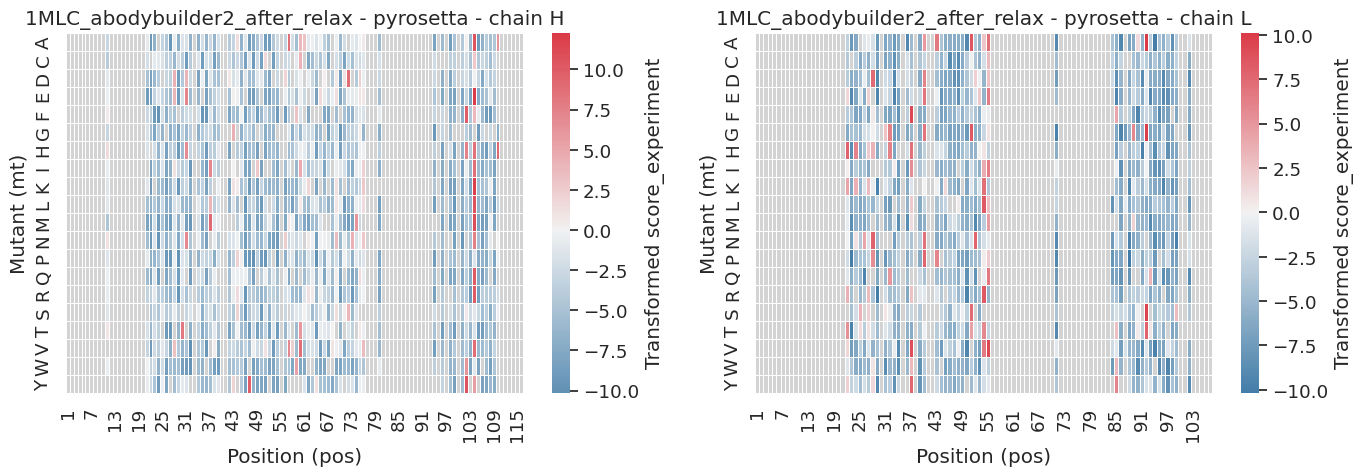

Sample: 1MLC_abodybuilder2_before_relax, Chain: H, Delta: delta_log_likelihood_pyrosetta
pivot shape: (20, 116)
pivot_transformed NaNs: 1023
Original NaNs before transformation: 1023
Sample: 1MLC_abodybuilder2_before_relax, Chain: L, Delta: delta_log_likelihood_pyrosetta
pivot shape: (20, 107)
pivot_transformed NaNs: 1228
Original NaNs before transformation: 1228


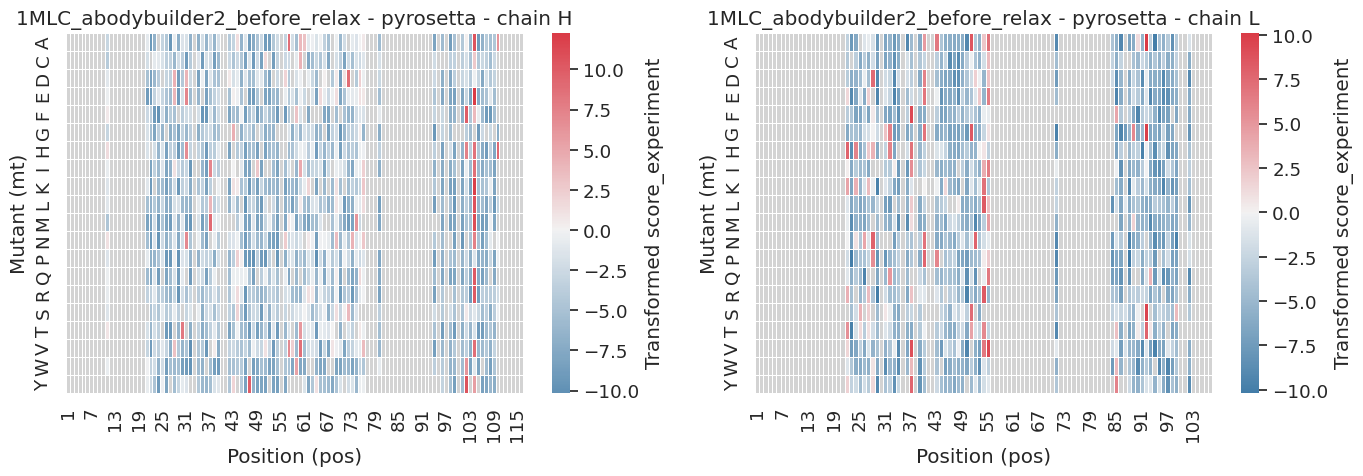

Sample: 1MLC_pdb_after_relax, Chain: H, Delta: delta_log_likelihood_pyrosetta
pivot shape: (20, 116)
pivot_transformed NaNs: 1023
Original NaNs before transformation: 1023
Sample: 1MLC_pdb_after_relax, Chain: L, Delta: delta_log_likelihood_pyrosetta
pivot shape: (20, 107)
pivot_transformed NaNs: 1228
Original NaNs before transformation: 1228


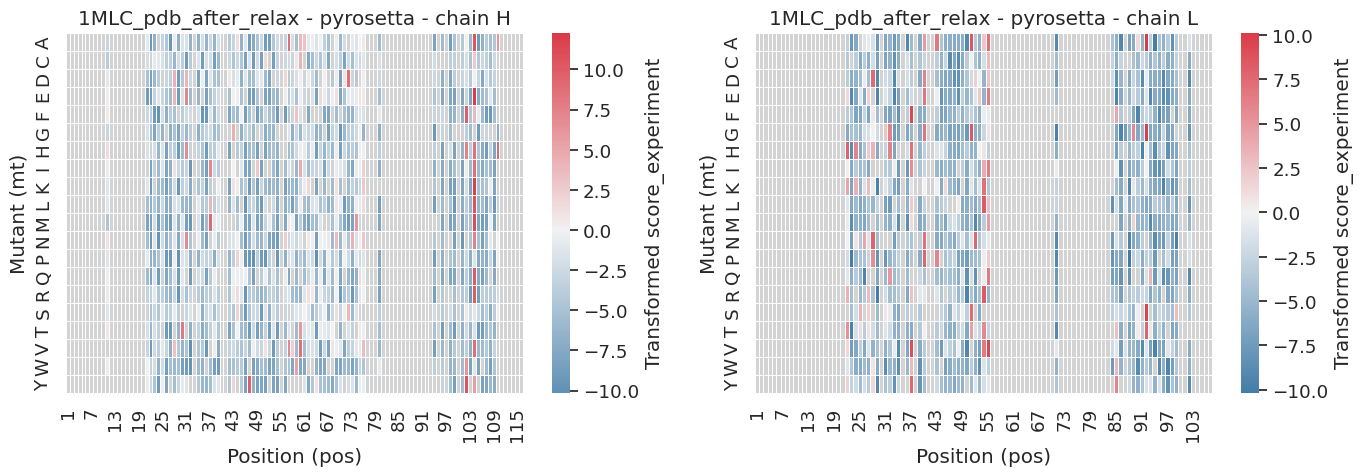

Sample: 1MLC_pdb_before_relax, Chain: H, Delta: delta_log_likelihood_pyrosetta
pivot shape: (20, 116)
pivot_transformed NaNs: 1023
Original NaNs before transformation: 1023
Sample: 1MLC_pdb_before_relax, Chain: L, Delta: delta_log_likelihood_pyrosetta
pivot shape: (20, 107)
pivot_transformed NaNs: 1228
Original NaNs before transformation: 1228


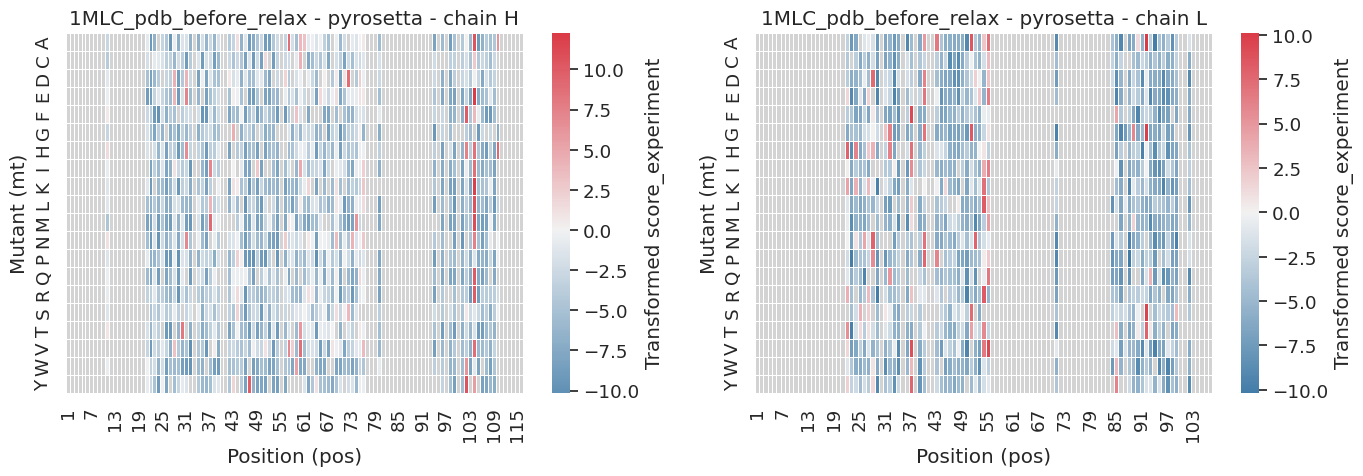

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Use your merged dataframe
df = pd.read_csv('/home/eva/0_point_mutation/benchmark_results/playground_mAb_DMS/merged_df_check.csv')


# Identify delta and score columns
score_cols = [col for col in df.columns if col.startswith("score")]
df[score_cols].fillna('0')
df['score_experiment'] = df['score_experiment'] * (-1)
samples = df['sample'].unique()

# Ensure numeric conversion
for col in score_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Define diverging cmap (with meaningful 0 as sperator) with grey mask
def get_diverging_cmap():
    cmap = sns.diverging_palette(240, 10, as_cmap=True)
    cmap.set_bad("lightgrey") #Nan or masked value 
    return cmap

def scale_up(x):
    try:
        return x * 3 if x > 0 else x * 1
    except:
        return np.nan
    
df['score_experiment'] = df['score_experiment'].apply(scale_up)

# Iterate through samples
for sample in samples:
    df_sample = df[df['sample'] == sample]

    # === Plot delta columns (with transform) ===
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    for j, chain_type in enumerate(['H', 'L']):
        df_chain = df_sample[df_sample['chain'] == chain_type]
        pivot = df_chain.pivot(index="mt", columns="pos", values=score_col).astype(float)

        # Mask where wt == mt
        mask_data = df_chain[df_chain['wt'] == df_chain['mt']]
        # only masked region is 0.0, the rest is NaN
        mask_matrix = mask_data.pivot(index="mt", columns="pos", values=delta_col)
        # convert to a proper boolean mask, 0.0->True, NaN->False
        mask = mask_matrix.notna().reindex_like(pivot).fillna(False)
        
        print(f"Sample: {sample}, Chain: {chain_type}, Delta: {delta_col}")
        print("pivot shape:", pivot.shape)
        print("pivot_transformed NaNs:", pivot.isna().sum().sum())
        print("Original NaNs before transformation:", pivot.isna().sum().sum())

        sns.heatmap(
            pivot,
            mask=mask,
            cmap=get_diverging_cmap(),
            center=0,
            linewidths=0.5,
            cbar_kws={"label": f"Transformed {score_col}"},
            ax=axs[j]
        )
        method_name = delta_col.split("_")[-1]
        axs[j].set_title(f"{sample} - {method_name} - chain {chain_type}")
        axs[j].set_ylabel("Mutant (mt)")
        axs[j].set_xlabel("Position (pos)")

    plt.tight_layout()
    plt.show()
